In [1]:
import pandas as pd
from pandas.errors import EmptyDataError
import numpy as np
from pathlib import Path
import re
from concurrent import futures as cf

In [2]:
bed_df = pd.read_csv('/home/panda2bat/Avivorous_bat/script/TOGA_run/test/input/toga.transcripts.bed', sep = '\t', header=None,
        names=[
            "chrom",
            "mRNAStart",
            "mRNAEnd",
            "gene",
            "score",
            "strand",
            "exonStart",
            "exonEnd",
            "itemRgb",
            "cdsCount",
            "cdsSizes",
            "cdsStarts",
        ],
    )
bed_df

,chrom,mRNAStart,mRNAEnd,gene,score,strand,exonStart,exonEnd,itemRgb,cdsCount,cdsSizes,cdsStarts
0,chr19,7595862,7618304,ENST00000160298,0,+,7596002,7618057,0,17,"288,254,123,96,139,140,94,55,74,70,1477,140,30...","0,9363,10408,10613,12263,14613,14837,15014,152..."
1,chr13,66303344,67229818,ENST00000456367,0,-,66304654,67228440,0,5,"1684,76,102,3171,39,","0,327865,600159,922060,926435,"
2,chr5,94707495,95081482,ENST00000312216,0,-,94707495,95081482,0,23,"72,98,110,110,54,120,120,75,102,103,103,94,187...","0,1016,3322,7281,71614,91517,160837,162921,163..."
3,chr12,112978394,113011723,ENST00000342315,0,+,112978608,113010484,0,11,"391,271,179,236,145,171,289,188,239,154,1350,","0,8643,16901,19125,19871,24537,26539,28018,293..."
4,chr13,113820548,113864076,ENST00000327773,0,-,113820863,113863920,0,15,"470,229,176,169,165,190,119,122,123,123,123,63...","0,1409,2826,6447,7998,11750,12085,14002,14964,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39659,chr13,63746740,63748176,ENST00000611641,0,+,63746800,63747190,0,1,"1436,","0,"
39660,chr6,32934635,32941028,ENST00000418107,0,-,32934970,32940807,0,6,"352,36,117,285,282,276,","0,706,900,2536,4048,6117,"
39661,chr1,147611589,147611796,ENST00000675347,0,+,147611589,147611796,0,1,"207,","0,"
39662,chr1,41585305,41628816,ENST00000646142,0,-,41585305,41628816,0,2,"13,68,","0,43443,"


In [3]:
bed_df['cdsLength'] = bed_df.cdsSizes.apply(lambda x: sum([int(i) for i in x.strip(',').split(',')]))

In [10]:
bed_info = bed_df[['gene', 'mRNAStart', 'mRNAEnd', 'cdsCount', 'cdsLength', 'chrom']]
bed_info.mRNAStart = bed_info.mRNAStart.astype('int')
bed_info.mRNAEnd = bed_info.mRNAEnd.astype('int')
bed_info.cdsCount = bed_info.cdsCount.astype(int)
bed_info.cdsLength = bed_info.cdsLength.astype(int)
bed_info['gene_len'] = bed_info.mRNAEnd - bed_info.mRNAStart
bed_info


/tmp/ipykernel_3442441/1179434307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_info.mRNAStart = bed_info.mRNAStart.astype('int')
/tmp/ipykernel_3442441/1179434307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_info.mRNAEnd = bed_info.mRNAEnd.astype('int')
/tmp/ipykernel_3442441/1179434307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,gene,mRNAStart,mRNAEnd,cdsCount,cdsLength,chrom,gene_len
0,ENST00000160298,7595862,7618304,17,4137,chr19,22442
1,ENST00000456367,66303344,67229818,5,5072,chr13,926474
2,ENST00000312216,94707495,95081482,23,2337,chr5,373987
3,ENST00000342315,112978394,113011723,11,3613,chr12,33329
4,ENST00000327773,113820548,113864076,15,2508,chr13,43528
...,...,...,...,...,...,...,...
39659,ENST00000611641,63746740,63748176,1,1436,chr13,1436
39660,ENST00000418107,32934635,32941028,6,1348,chr6,6393
39661,ENST00000675347,147611589,147611796,1,207,chr1,207
39662,ENST00000646142,41585305,41628816,2,81,chr1,43511


In [11]:
#　Obtain the the correct chain infomation
ortho_score_df = pd.read_csv('/home/panda2bat/Avivorous_bat/output/15_gene_loss/DesRot/TOGA_normal_pipeline/toga.stop.at.class/temp/orthology_scores.tsv', header = 0, sep = '\t')
ortho_score_df_modified = ortho_score_df.copy()
ortho_score_df_modified.pred = ortho_score_df_modified.pred.astype('float')
ortho_score_df_modified = ortho_score_df.groupby('gene', as_index=False).apply(lambda x: x.sort_values('pred', ascending=False).iloc[0,:])

chain_df = pd.DataFrame([i.strip().split(' ') for i in open('/home/panda2bat/Avivorous_bat/output/15_gene_loss/DesRot/TOGA_normal_pipeline/toga.stop.at.class/temp/genome_alignment.chain', 'r') if i.startswith('chain')])
chain_df_info = chain_df.copy()
chain_df_info = chain_df.iloc[:, [7, 12]]
chain_df_info.columns = ['chr', 'chain']
chain_df_info.chain = chain_df_info.chain.astype('int64')

/tmp/ipykernel_3442441/3143506196.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chain_df_info.chain = chain_df_info.chain.astype('int64')


In [12]:
ortho_score_info = pd.merge(ortho_score_df_modified, chain_df_info, on='chain', how = 'left')
ortho_score_info = pd.merge(ortho_score_info, bed_info, on = 'gene', how = 'left')
ortho_score_info = ortho_score_info[ortho_score_info.pred > 0.5]

In [19]:
ortho_score_info.sort_values(['chrom', 'mRNAStart']).to_csv('./miniprot.classifier.tsv', header = True, index = False, sep = ',')

In [21]:
isoform_df = pd.read_csv('/home/panda2bat/Avivorous_bat/script/TOGA_run/test/input/toga.isoforms.tsv', header=0, sep = '\t')
isoform_df

,GeneID,TransID
0,ENSG00000067445,ENST00000420798
1,ENSG00000123427,ENST00000300209
2,ENSG00000127314,ENST00000250559
3,ENSG00000151322,ENST00000548645
4,ENSG00000048392,ENST00000251810
...,...,...
39659,ENSG00000170323,ENST00000256104
39660,ENSG00000010932,ENST00000402921
39661,ENSG00000155229,ENST00000327238
39662,ENSG00000105143,ENST00000430939


In [34]:
ortho_score_info

,gene,chain,pred,chr,mRNAStart,mRNAEnd,cdsCount,cdsLength,chrom,gene_len
0,ENST00000000233,14,0.996369,NC_071392.1,127588410,127591700,6,1032,chr7,3290
1,ENST00000000412,4,0.996369,NC_071389.1,8940360,8949645,7,2450,chr12,9285
3,ENST00000001008,37,0.996369,NC_071389.1,2794969,2805423,10,3715,chr12,10454
4,ENST00000001146,13,0.996369,NC_071391.1,72129237,72148038,6,4732,chr2,18801
5,ENST00000002125,13,0.996369,NC_071391.1,37231657,37249160,10,2184,chr2,17503
...,...,...,...,...,...,...,...,...,...,...
39651,ENST00000684759,212,0.993439,NC_071387.1,137086984,137109183,13,2700,chr9,22199
39652,ENST00000684760,44,0.996369,NC_071395.1,82752073,82945900,40,7403,chr17,193827
39653,ENST00000684762,64,0.996135,NC_071396.1,99727404,99733437,3,2710,chr15,6033
39654,ENST00000684770,2330,0.993629,NC_071392.1,143620973,143730410,8,5561,chr7,109437


In [27]:
pd.merge(ortho_score_info, isoform_df, left_on='gene', right_on='TransID', how = 'inner').sort_values(['chr', 'mRNAStart']).to_csv('./miniprot.classifier.tsv', header = True, index = False, sep = ',')

In [28]:
def parse_miniprot_gff(gff):
    
    """ extract info """
    def extrac_info(x):
        x['length'] = x.end - x.start
        cds_num = len(x[x.type == 'CDS'])
        cds_len = sum(x[x.type == 'CDS'].loc[:, 'length'].tolist())
        stop = len(x[x.type == 'stop_codon']) 
        gene_len = int(x[x.type == 'mRNA']['length'].iloc[0])
        attributes = x[x.type == 'mRNA'].iloc[0, 8]
        identity = float(re.search(r'Identity=[\w\d.]+', attributes).group().replace('Identity=', ''))
        positive = float(re.search(r'Positive=[\w\d.]+', attributes).group().replace('Positive=', ''))
        chr =  	   x[x.type == 'mRNA'].iloc[0, 0]
        
        return pd.Series([chr, positive, identity, gene_len, cds_num, cds_len, stop], index = ['chr', 'positive', 'identity', 'gene_len', 'cds_num', 'cds_len', 'stop'])
    
    def replace_stop_codon(x):
        if x.type.tolist().count('stop_codon'):
            index = x[x.type == 'stop_codon'].index
            column = x.columns.tolist().index('attributes')
            x.iloc[index, column] = x.iloc[index-1, column]
            return x
        else:
            return x
    
    file_buff = [i.strip().split('\t') for i in open(gff, 'r') if not i.startswith('#')]
    if file_buff:
        df = pd.DataFrame(data = file_buff, 
            columns=[
            "seqid",
            "source",
            "type",
            "start",
            "end",
            "score",
            "strand",
            "phase",
            "attributes",
            ]
        )
        df = replace_stop_codon(df)
        df.start = df.start.astype('int')
        df.end = df.end.astype('int')
        df['gene'] = df.attributes.apply(lambda x: re.search(r'Target=[\w\d]+', x).group().replace('Target=', ''))
        df['ID'] = df.attributes.apply(lambda x: re.sub(r'.*=', '', x.split(';')[0]))
                
        terms = df.groupby(['gene', 'seqid', 'ID'], as_index = False).apply(lambda x: extrac_info(x))
        terms = terms.drop('ID', axis = 1).drop_duplicates()
    else:
        terms = pd.DataFrame()
    return terms 


In [29]:
miniprot_files = [i.strip() for i in open('/home/panda2bat/Avivorous_bat/script/TOGA_run/test/output.miniprot_classficier/miniprot_gff_files', 'r')]
print(len(miniprot_files))

18411


In [30]:
miniprot_files = [i.strip() for i in open('/home/panda2bat/Avivorous_bat/script/TOGA_run/test/output.miniprot_classficier/miniprot_gff_files', 'r')]
df_list = []
with cf.ProcessPoolExecutor() as e:
    process_lst = [e.submit(parse_miniprot_gff, gff) for gff in miniprot_files]
    for thread in cf.as_completed(process_lst):
        df_list.append(thread.result())

miniprot_info = pd.concat(df_list)
print(miniprot_info)

               gene           seqid             chr  positive  identity  \
0   ENST00000373020     NC_071400_1     NC_071400_1    0.9673    0.9429   
0   ENST00000002165     NC_071397_1     NC_071397_1    0.9101    0.8501   
0   ENST00000359326     NC_071398_1     NC_071398_1    0.8347    0.7315   
0   ENST00000003100     NC_071392_1     NC_071392_1    0.9745    0.9430   
0   ENST00000222462     NC_071392_1     NC_071392_1    0.9699    0.9534   
..              ...             ...             ...       ...       ...   
1   ENST00000612966     NC_071396_1     NC_071396_1    0.9853    0.9632   
2   ENST00000612966     NC_071397_1     NC_071397_1    0.9779    0.9559   
3   ENST00000612966     NC_071398_1     NC_071398_1    1.0000    1.0000   
12  ENST00000612966     NC_071398_1     NC_071398_1    0.9926    0.9926   
15  ENST00000612966  NW_026527616_1  NW_026527616_1    0.9926    0.9926   

    gene_len  cds_num  cds_len  stop  
0       5227        7      728     1  
0      12153        7

In [36]:
train_info = pd.merge(miniprot_info, ortho_score_info, on = 'gene', how = 'left', suffixes=['_miniprot', '_lastz'])
train_df = train_info[['gene','chr_miniprot', 'chr_lastz', 'positive', 'identity', 'cds_num', 'cdsCount', 'gene_len_miniprot', 'gene_len_lastz', 'cds_len', 'cdsLength', 'stop', 'pred']]
train_df['chr_lastz'] = train_df['chr_lastz'].apply(lambda x: str(x).replace('.', '_'))
train_df['valid'] = train_df.apply(lambda x: 1 if x['chr_miniprot'] == x['chr_lastz'] else 0, axis = 1)
train_df = train_df[train_df.pred > 0.5]
train_df

/tmp/ipykernel_3442441/1412397653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['chr_lastz'] = train_df['chr_lastz'].apply(lambda x: str(x).replace('.', '_'))
/tmp/ipykernel_3442441/1412397653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['valid'] = train_df.apply(lambda x: 1 if x['chr_miniprot'] == x['chr_lastz'] else 0, axis = 1)


,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid
0,ENST00000373020,NC_071400_1,NC_071400_1,0.9673,0.9429,7,8.0,5227,9699.0,728,3768.0,1,0.996369,1
1,ENST00000002165,NC_071397_1,NC_071397_1,0.9101,0.8501,7,7.0,12153,16909.0,1391,2385.0,1,0.996369,1
2,ENST00000359326,NC_071398_1,NC_071398_1,0.8347,0.7315,22,25.0,30367,59041.0,2531,4011.0,0,0.996369,1
3,ENST00000003100,NC_071392_1,NC_071392_1,0.9745,0.9430,10,10.0,14315,22325.0,1517,3155.0,1,0.996369,1
4,ENST00000222462,NC_071392_1,NC_071392_1,0.9699,0.9534,4,4.0,9926,12105.0,1082,3150.0,1,0.996369,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38024,ENST00000612966,NC_071396_1,NC_071398_1,0.9853,0.9632,3,1.0,6050,486.0,405,486.0,1,0.994725,0
38025,ENST00000612966,NC_071397_1,NC_071398_1,0.9779,0.9559,1,1.0,410,486.0,407,486.0,1,0.994725,0
38026,ENST00000612966,NC_071398_1,NC_071398_1,1.0000,1.0000,1,1.0,410,486.0,407,486.0,1,0.994725,1
38027,ENST00000612966,NC_071398_1,NC_071398_1,0.9926,0.9926,1,1.0,410,486.0,407,486.0,1,0.994725,1


In [108]:
train_df[(train_df.valid == 0)].sort_values('identity', ascending=False)

,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid
36402,ENST00000438607,NC_071388_1,NC_071394_1,1.0000,1.0000,1,4,194,3952,191,561,1,0.996369,0
34146,ENST00000539745,NC_071398_1,NC_071389_1,1.0000,1.0000,1,1,311,577,308,577,1,0.973296,0
34798,ENST00000361575,NC_071391_1,NC_071400_1,1.0000,1.0000,1,3,155,5127,152,390,1,0.996369,0
37618,ENST00000618305,NW_026527616_1,NC_071398_1,1.0000,1.0000,1,1,311,387,308,387,1,0.620924,0
33762,ENST00000377803,NW_026527616_1,NC_071398_1,1.0000,1.0000,1,1,311,405,308,405,1,0.995487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,ENST00000621109,NC_071390_1,NC_071398_1,0.4985,0.2449,2,6,7527,57732,335,2019,0,0.991746,0
35168,ENST00000376296,NC_071395_1,NC_071397_1,0.3977,0.2443,1,3,521,6186,521,3651,0,0.996369,0
21829,ENST00000287143,NC_071392_1,NC_071391_1,0.5000,0.2273,1,6,131,4382,131,869,0,0.996369,0
8533,ENST00000511469,NC_071391_1,NC_071390_1,0.4304,0.2152,1,9,197,41056,197,756,0,0.992466,0


In [37]:
train_df['cds_len_p'] = train_df.cds_len / train_df.cdsLength
train_df['gene_len_p'] = train_df.gene_len_miniprot / train_df.gene_len_lastz
train_df['cds_num_p'] = train_df.cds_num / train_df.cdsCount
train_df

,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid,cds_len_p,gene_len_p,cds_num_p
0,ENST00000373020,NC_071400_1,NC_071400_1,0.9673,0.9429,7,8.0,5227,9699.0,728,3768.0,1,0.996369,1,0.193206,0.538922,0.875
1,ENST00000002165,NC_071397_1,NC_071397_1,0.9101,0.8501,7,7.0,12153,16909.0,1391,2385.0,1,0.996369,1,0.583229,0.718730,1.000
2,ENST00000359326,NC_071398_1,NC_071398_1,0.8347,0.7315,22,25.0,30367,59041.0,2531,4011.0,0,0.996369,1,0.631015,0.514337,0.880
3,ENST00000003100,NC_071392_1,NC_071392_1,0.9745,0.9430,10,10.0,14315,22325.0,1517,3155.0,1,0.996369,1,0.480824,0.641209,1.000
4,ENST00000222462,NC_071392_1,NC_071392_1,0.9699,0.9534,4,4.0,9926,12105.0,1082,3150.0,1,0.996369,1,0.343492,0.819992,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38024,ENST00000612966,NC_071396_1,NC_071398_1,0.9853,0.9632,3,1.0,6050,486.0,405,486.0,1,0.994725,0,0.833333,12.448560,3.000
38025,ENST00000612966,NC_071397_1,NC_071398_1,0.9779,0.9559,1,1.0,410,486.0,407,486.0,1,0.994725,0,0.837449,0.843621,1.000
38026,ENST00000612966,NC_071398_1,NC_071398_1,1.0000,1.0000,1,1.0,410,486.0,407,486.0,1,0.994725,1,0.837449,0.843621,1.000
38027,ENST00000612966,NC_071398_1,NC_071398_1,0.9926,0.9926,1,1.0,410,486.0,407,486.0,1,0.994725,1,0.837449,0.843621,1.000


In [52]:
c = train_df.copy()

,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid,cds_len_p,gene_len_p,cds_num_p
0,ENST00000373020,NC_071400_1,NC_071400_1,0.9673,0.9429,7,8.0,5227,9699.0,728,3768.0,1,0.996369,1,0.193206,0.538922,0.875
1,ENST00000002165,NC_071397_1,NC_071397_1,0.9101,0.8501,7,7.0,12153,16909.0,1391,2385.0,1,0.996369,1,0.583229,0.718730,1.000
2,ENST00000359326,NC_071398_1,NC_071398_1,0.8347,0.7315,22,25.0,30367,59041.0,2531,4011.0,0,0.996369,1,0.631015,0.514337,0.880
3,ENST00000003100,NC_071392_1,NC_071392_1,0.9745,0.9430,10,10.0,14315,22325.0,1517,3155.0,1,0.996369,1,0.480824,0.641209,1.000
4,ENST00000222462,NC_071392_1,NC_071392_1,0.9699,0.9534,4,4.0,9926,12105.0,1082,3150.0,1,0.996369,1,0.343492,0.819992,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38024,ENST00000612966,NC_071396_1,NC_071398_1,0.9853,0.9632,3,1.0,6050,486.0,405,486.0,1,0.994725,0,0.833333,12.448560,3.000
38025,ENST00000612966,NC_071397_1,NC_071398_1,0.9779,0.9559,1,1.0,410,486.0,407,486.0,1,0.994725,0,0.837449,0.843621,1.000
38026,ENST00000612966,NC_071398_1,NC_071398_1,1.0000,1.0000,1,1.0,410,486.0,407,486.0,1,0.994725,1,0.837449,0.843621,1.000
38027,ENST00000612966,NC_071398_1,NC_071398_1,0.9926,0.9926,1,1.0,410,486.0,407,486.0,1,0.994725,1,0.837449,0.843621,1.000


In [96]:
c[c.gene == 'ENST00000005082']

,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid,cds_len_p,gene_len_p,cds_num_p,test
224,ENST00000005082,NW_026527665_1,NW_026527665_1,0.6187,0.4517,5,5.0,15172,20123.0,1804,2021.0,0,0.977654,1,0.892627,0.753963,1.0,0.340565


In [81]:
d = c.groupby('gene').agg({'valid': np.max}).reset_index()
d[d.valid == 0].gene.to_csv('/home/panda2bat/Avivorous_bat/output/15_gene_loss/DesRot/TOGA_normal_pipeline/miniprot/wrong.tsv', header=False, index=False)


In [76]:
c[c.valid == 1].gene.to_csv('/home/panda2bat/Avivorous_bat/output/15_gene_loss/DesRot/TOGA_normal_pipeline/miniprot/right.tsv', header = False ,index = False)

In [71]:
c.loc[:, 'gene_len_p'] = c.gene_len_p.apply(lambda x: (1/x) if x > 1 else x)
c.loc[:, 'cds_num_p'] = c.cds_num / c.cdsCount
c.loc[:, 'cds_num_p'] = c.cds_num_p.apply(lambda x: (1/x) if x > 1 else x)
c['test'] = c.identity * c.gene_len_p * c.cds_num_p
cc = c.sort_values('test')
cc[(cc.test <= 0.2) & (cc.valid == 0)]


,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid,cds_len_p,gene_len_p,cds_num_p,test
29346,ENST00000651278,NC_071387_1,NC_071389_1,0.6154,0.3590,1,11.0,113,270606.0,113,1293.0,0,0.895674,0,0.087394,0.000418,0.090909,0.000014
26648,ENST00000536561,NC_071392_1,NC_071396_1,0.6786,0.3571,1,7.0,83,70633.0,83,4063.0,0,0.957740,0,0.020428,0.001175,0.142857,0.000060
27254,ENST00000422521,NC_071394_1,NC_071391_1,0.8125,0.6250,1,5.0,47,94940.0,47,1115.0,0,0.996369,0,0.042152,0.000495,0.200000,0.000062
26647,ENST00000527084,NC_071392_1,NC_071396_1,0.6538,0.3462,1,6.0,77,67963.0,77,1308.0,0,0.987161,0,0.058869,0.001133,0.166667,0.000065
8521,ENST00000264218,NC_071391_1,NC_071390_1,0.4304,0.2152,1,10.0,197,41068.0,197,816.0,0,0.992466,0,0.241422,0.004797,0.100000,0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34020,ENST00000594295,NC_071398_1,NC_071397_1,0.5985,0.4543,4,6.0,19299,29640.0,2762,3819.0,0,0.890840,0,0.723226,0.651113,0.666667,0.197201
37155,ENST00000589717,NC_071395_1,NC_071398_1,0.6296,0.4917,4,4.0,11626,28793.0,1449,3542.0,0,0.752838,0,0.409091,0.403779,1.000000,0.198538
24864,ENST00000639893,NC_071399_1,NC_071400_1,0.7641,0.6396,14,18.0,24756,61851.0,2215,3904.0,0,0.843113,0,0.567367,0.400252,0.777778,0.199112
6980,ENST00000221138,NC_071396_1,NC_071399_1,0.9964,0.9964,6,7.0,6359,27203.0,819,1946.0,1,0.996135,0,0.420863,0.233761,0.857143,0.199645


In [22]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
import joblib
import random

In [23]:
def train_on(x, y):
    parameters = {
        "max_depth": [3, 5, 10, 15, 20, 25],
        "learning_rate": [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25],
        "n_estimators": [50, 100, 150, 200, 250, 300]
    }

    model = xgb.XGBClassifier(
        max_depth=10,
        learning_rate = 0.001,
        n_estimators = 2000,
        objective = 'binary:logistic',
        seed = 0
    )
    gs = GridSearchCV(
        model,
        param_grid=parameters,
        scoring="accuracy",
        cv=5,
        n_jobs=400,
    )
    gs.fit(x, y)
    print(f"Best parameters: {gs.best_params_}\nBest score: {gs.best_score_}")

In [117]:
train_df[(train_df.cdsCount == 1) & (train_df.valid == 1)]
train_df_sig = train_df[train_df.cdsCount == 1]
train_df_mul = train_df[train_df.cdsCount > 1]


In [118]:
train_df_sig

,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid,cds_len_p,gene_len_p,cds_num_p
1404,ENST00000369295,NC_071390_1,NC_071390_1,0.8894,0.8768,1,1,1403,3039,1400,3039,1,0.995487,1,0.460678,0.461665,1.0
1738,ENST00000645831,NC_071389_1,NC_071389_1,0.9514,0.9441,1,1,1640,3983,1637,3983,1,0.991572,1,0.410997,0.411750,1.0
2059,ENST00000246115,NC_071395_1,NC_071395_1,0.9117,0.8468,1,1,1154,1564,1151,1564,1,0.995487,1,0.735934,0.737852,1.0
3820,ENST00000194152,NC_071396_1,NC_071396_1,0.9195,0.8541,1,1,2387,3806,2384,3806,1,0.995487,1,0.626379,0.627168,1.0
3821,ENST00000378126,NC_071396_1,NC_071396_1,0.8769,0.8246,1,1,2411,3267,2411,3267,0,0.995487,1,0.737986,0.737986,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38020,ENST00000675181,NC_071398_1,NC_071398_1,1.0000,0.9688,1,1,98,99,95,99,1,0.995487,1,0.959596,0.989899,1.0
38022,ENST00000677665,NC_071392_1,NC_071392_1,0.8980,0.8286,1,1,737,1583,734,1583,1,0.995487,1,0.463677,0.465572,1.0
38023,ENST00000678139,NC_071388_1,NC_071388_1,0.8239,0.7955,1,1,998,2967,995,2967,1,0.992297,1,0.335356,0.336367,1.0
38027,ENST00000684204,NC_071387_1,NC_071399_1,0.7143,0.6190,1,1,62,84,62,84,0,0.991572,0,0.738095,0.738095,1.0


In [131]:
features = ['identity', 'cds_num_p', 'gene_len_miniprot', 'cdsCount']

train_x = train_df_mul[features]
train_y = train_df_mul.valid
train_on(train_x, train_y)

#s_features = ['identity']
#train_s_x = train_df_sig[s_features]
#train_s_y = train_df_sig.valid
#train_on(train_s_x, train_s_y)
#train_df_m = train_df[train_df.cds_num > 1]
#train_df_m_x = train_df_m[features]
#train_df_m_y = train_df_m.valid 
#train_on(train_df_m_x, train_df_m_y)


#train_df_s = train_df[train_df.cds_num == 1]
#train_df_s_x = train_df_s[features]
#train_df_s_y = train_df_s.valid 
#train_on(train_df_s_x, train_df_s_y)

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best score: 0.9824540688132964


In [133]:
from sklearn.feature_selection import SelectKBest, chi2

features = ['positive', 'identity', 'cds_num', 'cdsCount', 'gene_len_lastz', 'gene_len_miniprot', 'cds_len', 'cdsLength', 'stop', 'cds_len_p', 'gene_len_p', 'cds_num_p']

train_x = train_df_mul[features]
train_y = train_df_mul.valid
features_lst = []
for i in range(1, 10):
    selector = SelectKBest(score_func=chi2, k = i)
    X_new = selector.fit_transform(train_x, train_y)
    features_lst.append([features[i] for i in selector.get_support(indices=True)])

for i in features_lst:
    X = train_df_mul[i]
    print(i)
    train_on(X, train_y)
    
    

['gene_len_miniprot']
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best score: 0.9787298737994776
['gene_len_lastz', 'gene_len_miniprot']
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best score: 0.9787022837870621
['gene_len_lastz', 'gene_len_miniprot', 'cds_len']
Best parameters: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.9787298737994776
['gene_len_lastz', 'gene_len_miniprot', 'cds_len', 'cdsLength']
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best score: 0.9788678238615551
['cds_num', 'gene_len_lastz', 'gene_len_miniprot', 'cds_len', 'cdsLength']
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.9789229962753483
['cds_num', 'cdsCount', 'gene_len_lastz', 'gene_len_miniprot', 'cds_len', 'cdsLength']
Best parameters: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 50}
Best score: 0.981488566793993
['cds_num',

In [68]:
# 使用REFCV提取特征变量
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#clf = xgb.XGBClassifier(
#	max_depth=3,
#	learning_rate = 0.05,
#	n_estimators = 100,
#	objective = 'binary:logistic',
#	seed = 0
#)
clf = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=clf, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')

features = ['identity', 'cdsCount', 'cds_num', 'gene_len_lastz', 'gene_len_miniprot', 'positive', 'cds_p', 'gene_p']
train_x = train_df[features]
train_y = train_df.valid

rfecv.fit(train_x, train_y)
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features : %s" % rfecv.support_)
print("Ranking: %s" % rfecv.ranking_)
print("Features: %s" % [features[i] for i in rfecv.get_support(indices=True)])

Optimal number of features : 2
Selected features : [ True False False False False  True False False]
Ranking: [1 5 4 7 6 1 2 3]
Features: ['identity', 'positive']


In [79]:
# 使用SelectFromModel提取特征值

from sklearn.feature_selection import SelectFromModel

features = ['identity', 'cdsCount', 'cds_num', 'gene_len_lastz', 'gene_len_miniprot', 'positive', 'cds_p', 'gene_p']
train_x = train_df[features]
train_y = train_df.valid

clf = xgb.XGBClassifier(
	learning_rate = 0.05,
	max_depth = 3,
	n_estimators = 250
)
clf.fit(train_x, train_y)
importance = clf.feature_importances_
sfm = SelectFromModel(clf, max_features=5)
X_selected = sfm.fit_transform(train_x, train_y)
print("feature: %s" % [features[i] for i in sfm.get_support(indices=True)])
print("Selected features shape : ", X_selected.shape)


feature: ['identity', 'cds_p', 'gene_p']
Selected features shape :  (36565, 3)


In [83]:
# feature: ['identity', 'cds_p', 'gene_p']
# Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}

model = xgb.XGBClassifier(
	learning_rate = 0.05,
	max_depth = 3,
	n_estimators = 250
)
kfold = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
results = cross_val_score(model, X_selected, train_y, cv=kfold, n_jobs=400)
model.fit(X_selected, train_y)
#joblib.dump(model, '/home/panda2bat/Avivorous_bat/script/TOGA/models/me_model.dat')
print("Accuracy: {0:.3f} {1:.3f}".format(results.mean() * 100, results.std() * 100))



Accuracy: 98.542 0.092


In [78]:
print("feature: %s" % [features[i] for i in sfm.get_support(indices=True)])

feature: ['identity', 'gene_len_miniprot', 'cds_p']


In [77]:
# feature: ['identity', 'gene_len_miniprot', 'cds_p']
train_on(X_selected, train_y)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
Best score: 0.9856420073841103


In [124]:
train_df

,gene,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,cds_len,cdsLength,stop,pred,valid,cds_len_p,gene_len_p,cds_num_p
0,ENST00000373020,NC_071400_1,NC_071400_1,0.9673,0.9429,7,8,5227,9699,728,3768,1,0.996369,1,0.193206,0.538922,0.87500
1,ENST00000373031,NC_071400_1,NC_071400_1,0.9748,0.9653,7,7,15862,14950,944,1205,1,0.996369,1,0.783402,1.061003,1.00000
2,ENST00000371582,NC_071392_1,NC_071392_1,0.8885,0.8502,9,10,19778,23689,804,1161,1,0.996369,1,0.692506,0.834902,0.90000
3,ENST00000371584,NC_071392_1,NC_071392_1,0.8915,0.8475,10,10,19778,23588,869,1084,1,0.996369,1,0.801661,0.838477,1.00000
4,ENST00000371588,NC_071392_1,NC_071392_1,0.9654,0.9385,9,9,19778,23663,771,1054,1,0.996369,1,0.731499,0.835820,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38024,ENST00000684596,NC_071387_1,NC_071387_1,0.8976,0.8549,31,32,55651,106119,6695,11253,1,0.996369,1,0.594952,0.524421,0.96875
38025,ENST00000482026,NC_071388_1,NC_071388_1,0.8745,0.7772,5,5,28837,44192,1594,2364,1,0.996369,1,0.674281,0.652539,1.00000
38026,ENST00000373414,NC_071388_1,NC_071388_1,0.8652,0.7622,5,5,28837,60308,1594,2345,1,0.996369,1,0.679744,0.478162,1.00000
38027,ENST00000684204,NC_071387_1,NC_071399_1,0.7143,0.6190,1,1,62,84,62,84,0,0.991572,0,0.738095,0.738095,1.00000


In [128]:
features = ['identity','positive', 'cdsCount', 'cds_num', 'gene_len_lastz', 'gene_len_miniprot', 'cds_len_p', 'gene_len_p', 'cds_num_p', 'stop']
#features = ['identity', 'positive']
train_x = train_df_mul[features]
train_y = train_df_mul.valid

clf = xgb.XGBClassifier()
clf.fit(train_x, train_y)
importance = clf.feature_importances_
print(importance)

[0.14718625 0.05521816 0.06471653 0.06051937 0.05278768 0.08934224
 0.04930868 0.06027355 0.2136268  0.20702076]


In [70]:
features = ['positive', 'identity']
#features = ['identity', 'cds_p', 'gene_len_miniprot', 'cdsCount', '']
train_x = train_df[features]
train_y = train_df.valid
train_on(train_x, train_y)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.9830165458772051


In [191]:
def model(x,y):
    model = xgb.XGBClassifier(
		learning_rate = 0.05,
		max_depth = 5,
		n_estimators = 250
	)
    kfold = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
    results = cross_val_score(model, x, y, cv=kfold, n_jobs=400)
    model.fit(x, y)
    #joblib.dump(model, '/home/panda2bat/Avivorous_bat/script/TOGA/models/me_model.dat')
    print(f"Using features: {x.columns}")
    print("Accuracy: {0:.3f} {1:.3f}".format(results.mean() * 100, results.std() * 100))

In [192]:
model(train_x, train_y)

Using features: Index(['positive', 'identity', 'gene_len', 'cds_num', 'cds_len'], dtype='object')
Accuracy: 98.644 0.084


In [84]:
train_df[train_df.valid == 0]

,chr_miniprot,chr_lastz,positive,identity,cds_num,cdsCount,gene_len_miniprot,gene_len_lastz,pred,valid,cds_p,gene_p
222,NW_026527665_1,NC_071398_1,0.6453,0.4759,4,5,15172,21295,0.925505,0,0.800000,0.712468
223,NW_026527665_1,NC_071398_1,0.6435,0.4742,4,4,15172,21219,0.925505,0,1.000000,0.715020
224,NW_026527665_1,NC_071398_1,0.6050,0.4389,5,6,15172,21220,0.925505,0,0.833333,0.714986
226,NW_026527665_1,NC_071398_1,0.6066,0.4404,5,7,15172,21295,0.925505,0,0.714286,0.712468
633,NC_071392_1,NC_071393_1,0.8633,0.7338,6,5,999,48715,0.988490,0,1.200000,0.020507
...,...,...,...,...,...,...,...,...,...,...,...,...
37021,NC_071393_1,NC_071395_1,0.8057,0.6975,1,2,926,3491,0.894208,0,0.500000,0.265254
37028,NC_071393_1,NC_071391_1,0.8057,0.6911,1,2,926,2069,0.904117,0,0.500000,0.447559
37082,NC_071396_1,NC_071398_1,0.9853,0.9632,20,1,6050,511,0.991232,0,20.000000,11.839530
37084,NC_071396_1,NC_071398_1,0.9853,0.9632,20,1,6050,486,0.994725,0,20.000000,12.448560


In [88]:
train_info[(train_info.cds_num == 20) & (train_info.chr_miniprot == 'NC_071396_1')]

,gene,chr_miniprot,positive,identity,gene_len_miniprot,cds_num,cds_len,stop,chain,pred,chr_lastz,mRNAStart,mRNAEnd,cdsCount,gene_len_lastz
1149,ENST00000420893,NC_071396_1,0.9651,0.9403,53252,20,2644,0,45,0.996369,NC_071396.1,137940180,138033085,22,92905
3380,ENST00000682015,NC_071396_1,0.9954,0.9861,65793,20,2569,0,55,0.996369,NC_071396.1,236686638,236764595,20,77957
3446,ENST00000639914,NC_071396_1,0.9887,0.9760,75634,20,2104,0,10,0.996369,NC_071396.1,41955233,42070518,25,115285
3841,ENST00000342933,NC_071396_1,0.9458,0.9166,86152,20,2740,0,54,0.996369,NC_071396.1,5392380,5544310,22,151930
9567,ENST00000506545,NC_071396_1,0.9152,0.8683,11142,20,2650,0,45,0.996369,NC_071396.1,140360209,140374844,21,14635
9728,ENST00000394421,NC_071396_1,0.9735,0.9650,52119,20,3094,0,45,0.996369,NC_071396.1,146447331,146511023,21,63692
10656,ENST00000264187,NC_071396_1,0.9030,0.8428,67543,20,3706,0,55,0.996369,NC_071396.1,235975829,236065090,20,89261
10674,ENST00000675685,NC_071396_1,0.9536,0.9131,92413,20,5086,0,55,0.996369,NC_071396.1,232397989,232630496,22,232507
14560,ENST00000276175,NC_071396_1,0.6655,0.5049,38250,20,3316,0,36,0.996369,NC_071400.1,106802812,106874117,21,71305
14561,ENST00000357242,NC_071396_1,0.6690,0.5079,38250,20,3316,0,36,0.996369,NC_071400.1,106802672,106876150,21,73478


In [2]:
from plotnine import *
import pandas as pd

In [51]:
final_df = pd.read_csv('/home/panda2bat/Avivorous_bat/output/15_gene_loss/DesRot/TOGA_normal_pipeline/miniprot/final_df', header = 0)
final_df_right = final_df[final_df.valid == 1]
final_df_wrong = final_df[final_df.valid == 0]

In [32]:
final_df
final_df_single = final_df[final_df.exon_num_bed == 1]
final_df_multiple = final_df[final_df.exon_num_bed > 1]

In [49]:
final_df = final_df.drop(columns=['percent', 'exon_percent'])
final_df['percent'] = final_df.apply(lambda x: (x['identical']/x['exon_num_miniprot']) / (x['pep_len'] / x['exon_num_bed']), axis=1)
final_df

,GeneID,TransID,pred,chr_lastz,chr_bed,start,end,gene,exon_num_miniprot,chr_miniprot,ID,exon_num_bed,pep_len,identical,valid,percent
0,ENSG00000256618,ENST00000540040,0.969130,NC_022423_1,chr17,22523110,22524663,ENST00000540040,1,NC_071398_1,MP105432,1,24,8,0,0.333333
1,ENSG00000270672,ENST00000604952,0.656527,NC_022423_1,chr7,142666271,142667718,ENST00000604952,1,NC_071392_1,MP045910,1,24,12,0,0.500000
2,ENSG00000161980,ENST00000293860,0.996369,NC_071387_1,chr16,46406,53608,ENST00000293860,3,NC_071387_1,MP057532,3,108,105,1,0.972222
3,ENSG00000261456,ENST00000568584,0.988618,NC_071387_1,chr10,46887,49296,ENST00000568584,4,NC_071387_1,MP046413,4,444,402,1,0.905405
4,ENSG00000261456,ENST00000568584,0.988618,NC_071387_1,chr10,46887,49296,ENST00000568584,4,NC_071395_1,MP046414,4,444,397,0,0.894144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39086,ENSG00000214652,ENST00000456806,0.877901,NW_026527665_1,chr7,64045433,64085339,ENST00000456806,4,NC_071398_1,MP024882,6,499,273,0,0.820641
39087,ENSG00000223614,ENST00000429565,0.914330,NW_026527665_1,chr7,64207089,64220508,ENST00000429565,4,NC_071396_1,MP023303,4,412,192,0,0.466019
39088,ENSG00000234444,ENST00000423484,0.748605,NW_026527665_1,chr7,64313960,64356634,ENST00000423484,4,NC_071396_1,MP093673,5,427,216,0,0.632319
39089,ENSG00000146757,ENST00000431504,0.868384,NW_026527665_1,chr7,65373838,65401125,ENST00000431504,2,NC_071394_1,MP057802,3,510,262,0,0.770588


In [50]:
final_train_x = final_df[['percent', 'pep_len', 'exon_num_miniprot', 'exon_num_bed']]
final_train_y = final_df.valid
train_on(final_train_x, final_train_y)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best score: 0.975262827221842


In [42]:
final_train_x = final_df_multiple[['percent', 'pep_len', 'exon_num_miniprot', 'exon_num_bed']]
final_train_y = final_df_multiple.valid
train_on(final_train_x, final_train_y)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.9829288903284124


In [45]:
train_x = final_df_single[['exon_num_bed', 'exon_num_miniprot', 'pep_len', 'identical']]
train_y = final_df_single.valid 
train_on(train_x, train_y)


Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Best score: 0.8993453268043432


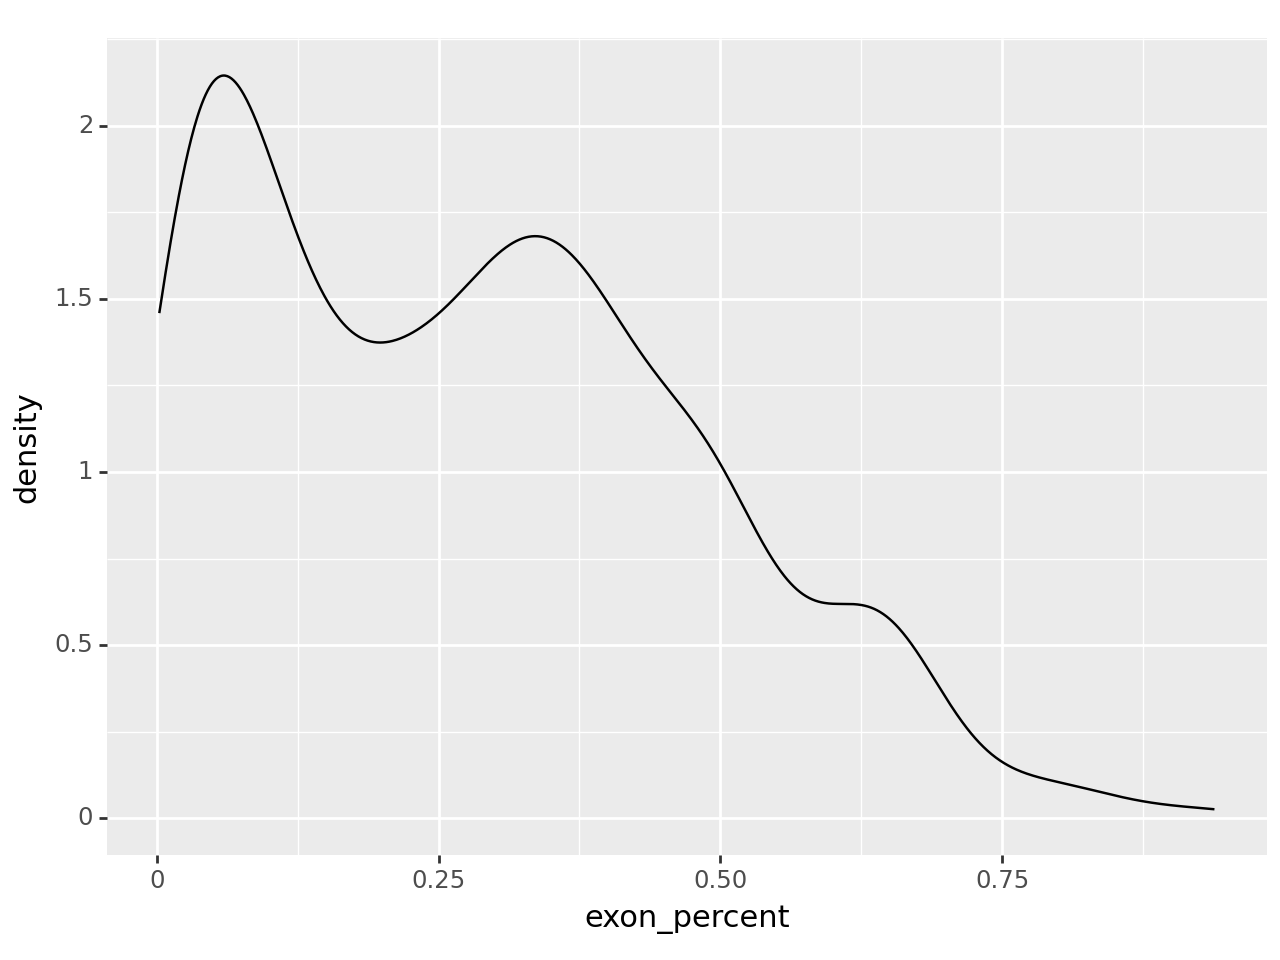

<Figure Size: (640 x 480)>

In [52]:
a = final_df_wrong[~final_df_wrong.GeneID.isin(final_df_right.GeneID.tolist())]
ggplot(a, aes('exon_percent')) + geom_density()

In [54]:
final_df[final_df.gene == 'ENST00000641515']

,GeneID,TransID,pred,chr_lastz,chr_bed,start,end,gene,exon_num_miniprot,chr_miniprot,ID,exon_num_bed,pep_len,identical,percent,valid,exon_percent
18880,ENSG00000186092,ENST00000641515,0.985531,NC_071393_1,chr1,65418,71585,ENST00000641515,3,NC_071393_1,MP113027,2,326,185,0.567485,1,0.378323
18881,ENSG00000186092,ENST00000641515,0.985531,NC_071393_1,chr1,65418,71585,ENST00000641515,3,NC_071393_1,MP113028,1,326,184,0.564417,1,0.188139


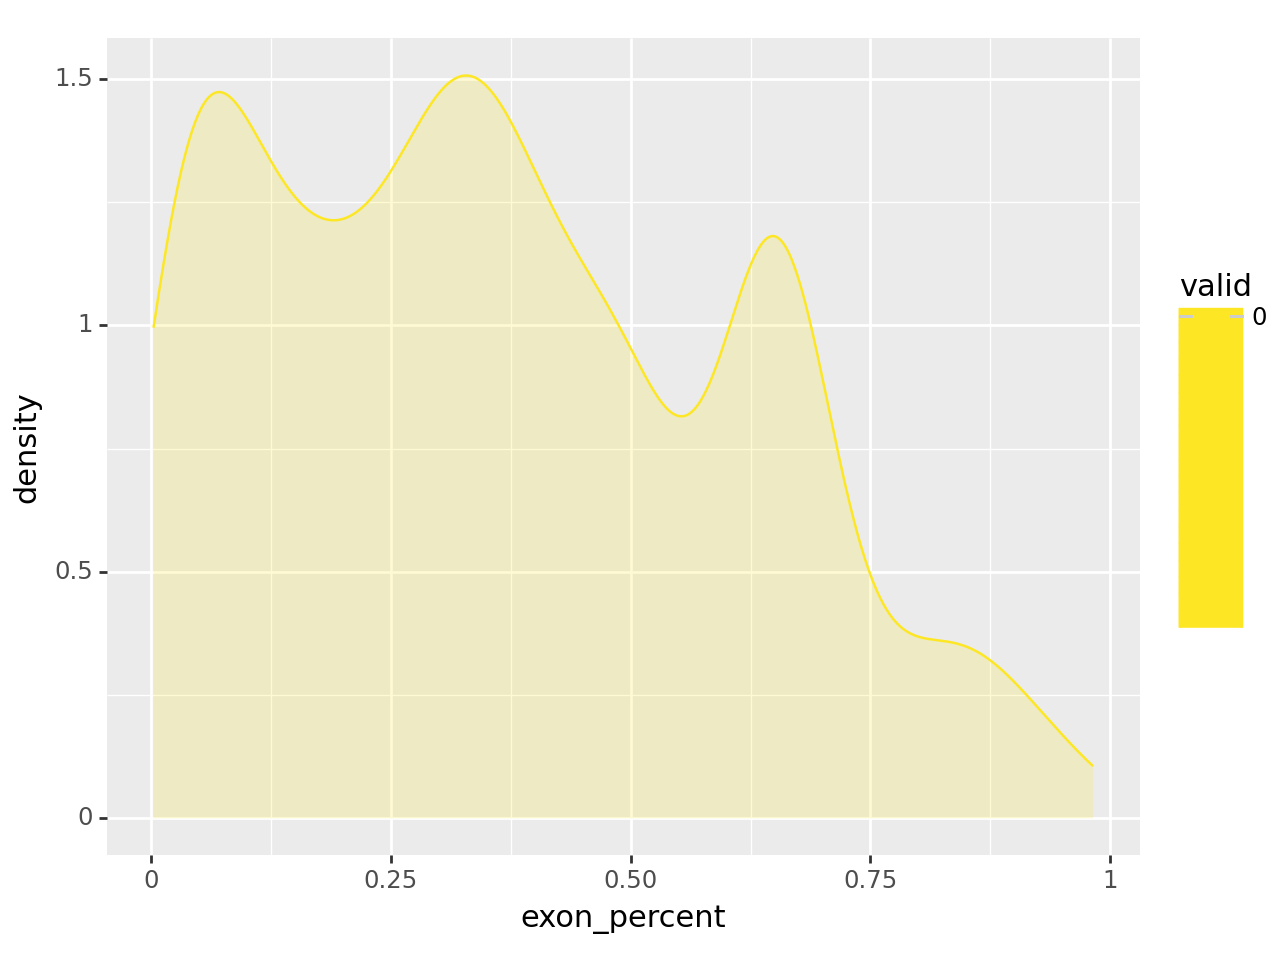

<Figure Size: (640 x 480)>

In [13]:
ggplot(final_df_wrong, aes('exon_percent', fill = 'valid', color = 'valid')) + geom_density(alpha = .2)

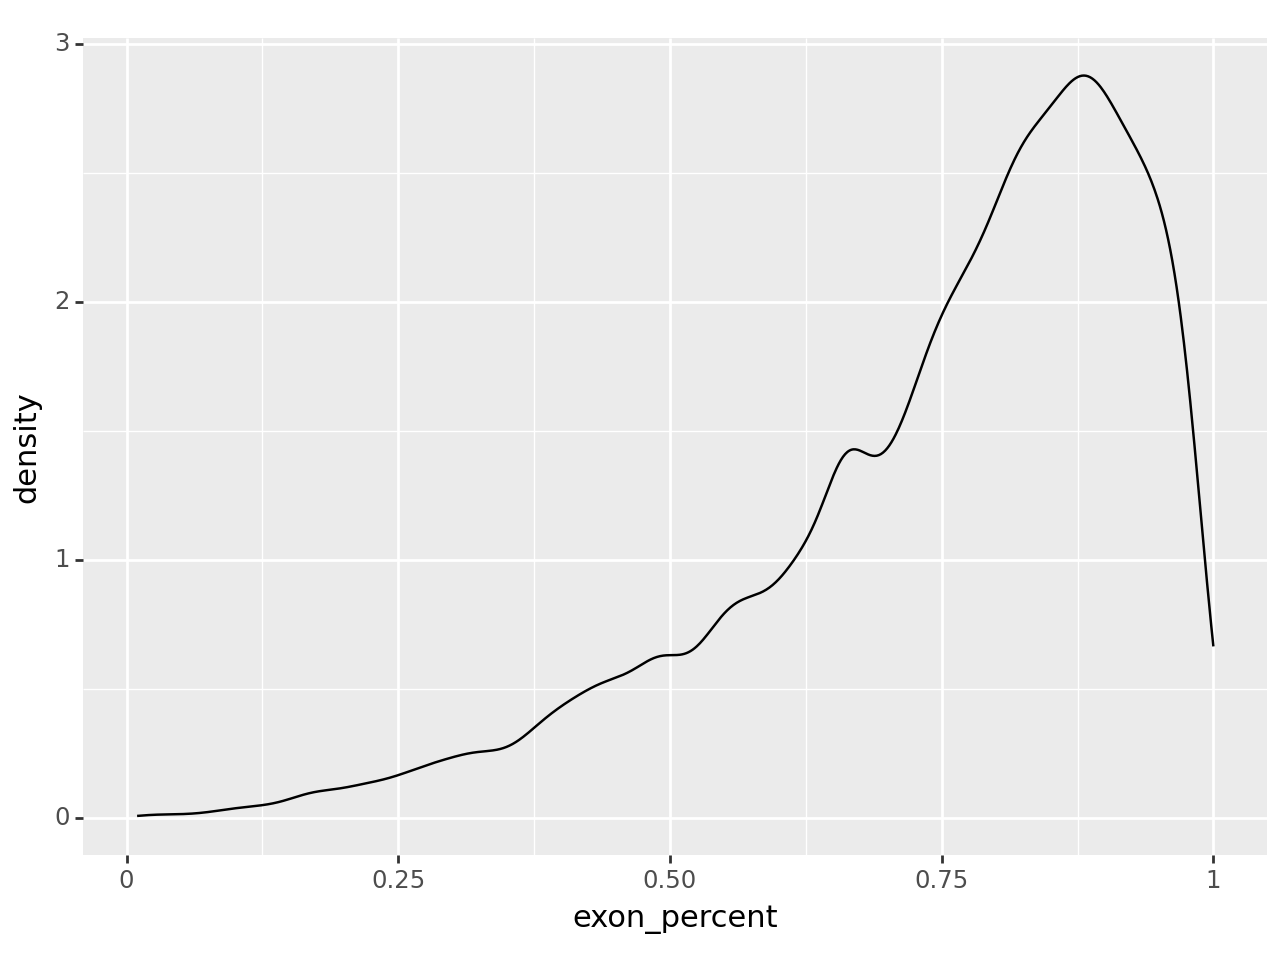

<Figure Size: (640 x 480)>

In [7]:
ggplot(final_df_right, aes('exon_percent')) + geom_density()